# DSE 200 FINAL PROJECT
## Fall 2025
### Due Date: November 21th, 2025

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting.

There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.

## Step 1: Find a dataset or datasets

Based on your interest, identify a dataset which you will want to examine.  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about.


This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask. You are expected to use at least two interconnected datasets, e.g., two tables in one database or a combination of datasets which you can merge in some meaningful way.


In [2]:
#EXPLAIN AND INGEST YOUR DATASET IN THIS SECTION

Let's import what we'll need

In [3]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns

Donwload what we need from kaggle

In [4]:

# Download latest version
path = kagglehub.dataset_download("mattiuzc/stock-exchange-data")

print("Path to dataset files:", path)

#with open(path)

100%|██████████| 4.56M/4.56M [00:00<00:00, 123MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mattiuzc/stock-exchange-data/versions/2


In [5]:
os.listdir(path)

['indexData.csv', 'indexInfo.csv', 'indexProcessed.csv']

Load the Data info dataframes

In [6]:
df_data = pd.read_csv(os.path.join(path, "indexData.csv"))
df_info = pd.read_csv(os.path.join(path, "indexInfo.csv"))
df_processed = pd.read_csv(os.path.join(path, "indexProcessed.csv"))

## Step 2: Explore the datasets

In this step, you should explore what is present in the data and how the data is organized. You’ll need to determine what common features allow you to merge the datasets.  

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)?
* What will you need to do to clean and/or transform the raw data for analysis?

You are also expected to use the _matplotlib_ library to visually explore the datasets and explain your findings, specifically,

* How are the data distributed?
* What are some common trends?
* What are the relationships between variables in your datasets?

In [7]:
#PERFORM AND EXPLAIN YOUR EXPLORATORY ANALYSIS IN THIS SECTION

### Data overview
indexData.csv: daily price + volume data for major global indices

indexInfo.csv: metadata: region, exchange, currency, index name

indexProcessed.csv: cleaned version of the price data with USD-normalized closes (CloseUSD)

In [8]:

df_data.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [9]:
df_info.head()

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY


In [10]:
df_processed.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


### Explaination of data analysis
- Looking for data shape, content, & quality issues

### Check their shapes

In [11]:
df_data.shape, df_info.shape, df_processed.shape

((112457, 8), (14, 4), (104224, 9))

From the shape we can see that df_data and df_processed the majority of info and processed likely has fewer rows since it already been cleaned.

In [12]:
df_data.sample()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
51976,GSPTSE,2020-10-23,16312.59961,16334.79981,16228.59961,16304.09961,16304.09961,1.887496e+10


### Check their column content

In [13]:
df_data.info(), df_info.info(), df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    14 non-null     object
 1   Exchange  14 non-null     object
 2   Index     14 non-null     object
 3   Currency  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104

(None, None, None)

From the shape we can see the majority of columns are numeric except for df_info.

Next we'll take a look at how many missing values we have to deal with.

In [14]:
df_data.isnull().sum(), df_info.isnull().sum(), df_processed.isnull().sum()

(Index           0
 Date            0
 Open         2204
 High         2204
 Low          2204
 Close        2204
 Adj Close    2204
 Volume       2204
 dtype: int64,
 Region      0
 Exchange    0
 Index       0
 Currency    0
 dtype: int64,
 Index        0
 Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 CloseUSD     0
 dtype: int64)

Plotting the missingingness of the data we see no column is greater than 2% missing data.

Text(0.5, 1.0, 'Percentage of Missing Values by Column')

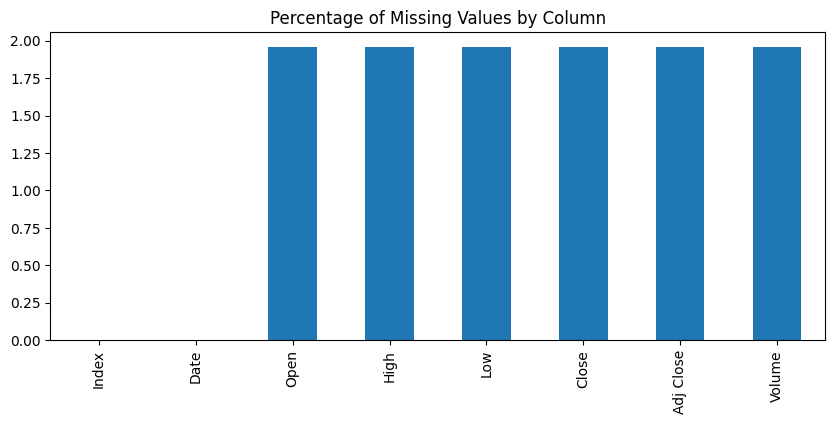

In [15]:
import matplotlib.pyplot as plt
(df_data.isnull().mean()*100).plot(kind="bar", figsize=(10,4))
plt.title("Percentage of Missing Values by Column")

Check the index

In [16]:
df_data.Index.unique()

array(['NYA', 'IXIC', 'HSI', '000001.SS', 'GSPTSE', '399001.SZ', 'NSEI',
       'GDAXI', 'KS11', 'SSMI', 'TWII', 'J203.JO', 'N225', 'N100'],
      dtype=object)

From the review we can see that while df_data has the only missing values which also are only numeric columns, the df_processed has been cleaned of all the missing data issues.
Next we'll check the size of the dataframe before the merge and then after to make sure we don't have any loss.

In [17]:
df_data.shape[0]

112457

In [18]:
df_data_index = df_data.merge(df_info, how= 'left', on='Index')
df_data_index.shape[0]

112457

Check duplicates

In [19]:
df_data_index.duplicated().sum()
# none exist

np.int64(0)

Next we'll check all the data types for feature correlation

In [20]:
# numeric columns
print('All columns: ', df_data_index.columns,'\n')

print('Numeric columns: ', df_data_index.select_dtypes(include="number").columns)

All columns:  Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Region', 'Exchange', 'Currency'],
      dtype='object') 

Numeric columns:  Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Check each numeric variable's distribution for skew, outiers or dominant categories

In [21]:
df_data_index.select_dtypes(include="number").describe()

,Open,High,Low,Close,Adj Close,Volume
count,110253.000000,110253.000000,110253.000000,110253.000000,110253.000000,1.102530e+05
mean,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09
std,9011.478913,9066.638548,8954.506981,9011.510444,9011.608900,4.315783e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1855.030029,1864.510010,1843.979980,1855.060059,1854.179565,0.000000e+00
50%,5194.089844,5226.279785,5154.049805,5194.750000,5194.750000,4.329000e+05
75%,10134.299810,10207.820310,10060.349610,10134.830080,10134.830080,1.734314e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


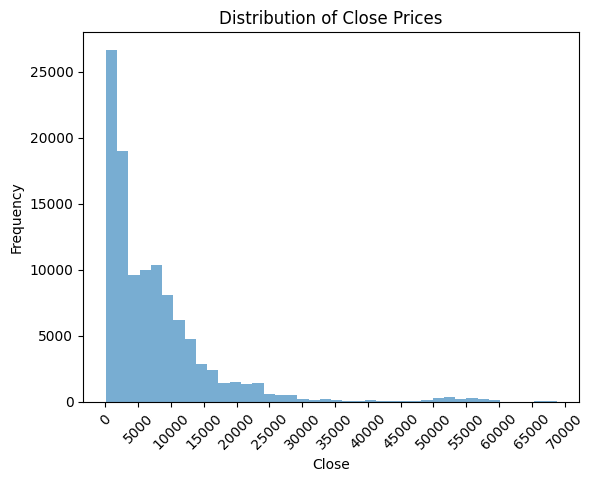

In [22]:
# Open high, low, close, adj close are fairly similar so will just plot 1
# create two histograms to evaluate the layout of the data
plt.hist(df_data_index['Close'], bins=40, alpha=0.6)
plt.title('Distribution of Close Prices')
plt.xlabel("Close")
plt.ylabel("Frequency")
plt.xticks(
    ticks=range(0, 70001,5000),
           rotation=45
)
plt.show()

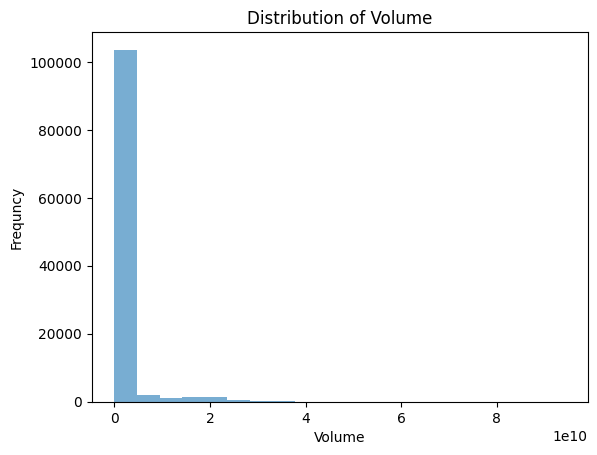

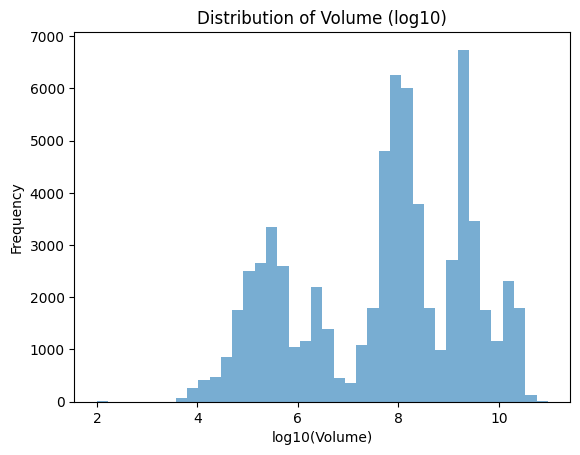

In [23]:
# Volume has unique values so will plot it
plt.hist(df_data_index["Volume"],bins=20,alpha=0.6)
plt.title("Distribution of Volume")
plt.xlabel("Volume")
plt.ylabel("Frequncy")
# plt.xticks(
#     ticks=range(0,8,2),
#     rotation=45
# )
plt.show()

# since we see a large right skew we'll use log to trasform the data

plt.hist(
    df_data_index['Volume'][df_data_index['Volume'] > 0].apply(np.log10),
    bins=40, alpha=0.6
)

plt.title("Distribution of Volume (log10)")
plt.xlabel("log10(Volume)")
plt.ylabel("Frequency")
plt.show()


Numeric vs. Categorical Analysis

In [24]:
numeric_columns = df_data_index.select_dtypes(include=["number"]).columns
categorical_columns = df_data_index.select_dtypes(exclude=["number"]).columns

In [47]:
categorical_columns

Index(['Index', 'Date', 'Region', 'Exchange', 'Currency'], dtype='object')

/tmp/ipython-input-346261631.py:1: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_data_index['Daily_Return'] = df_data_index.groupby('Index')['Close'].pct_change()


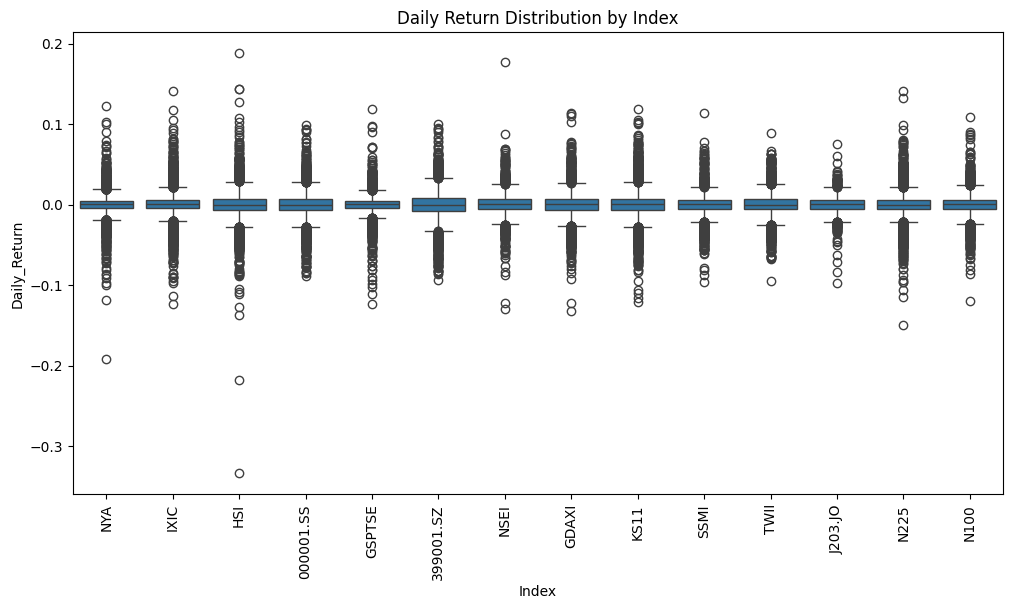

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


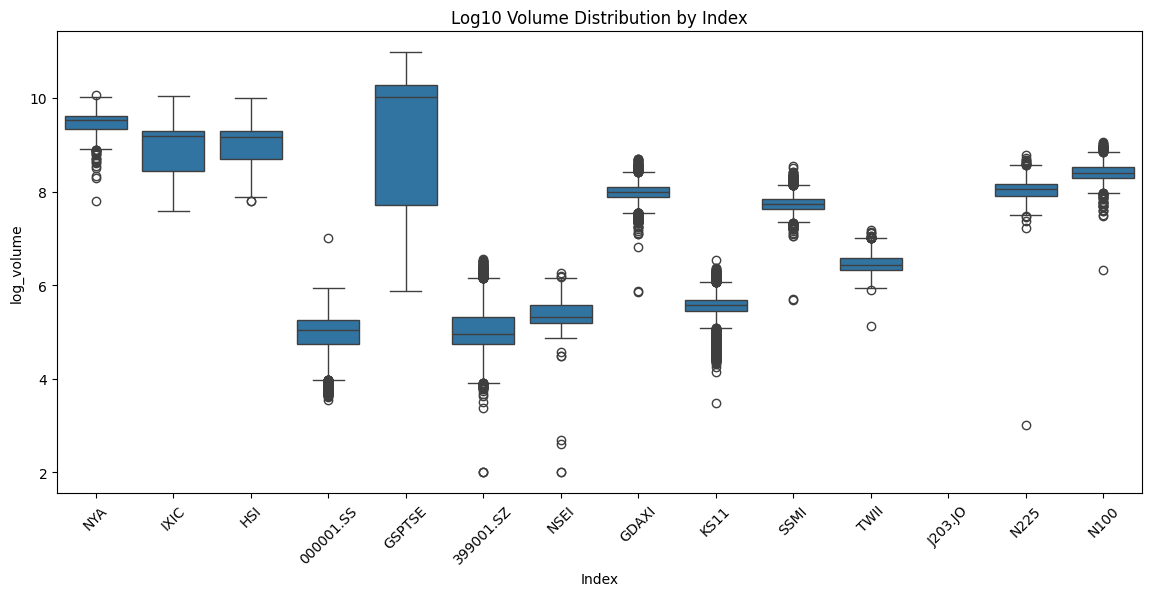

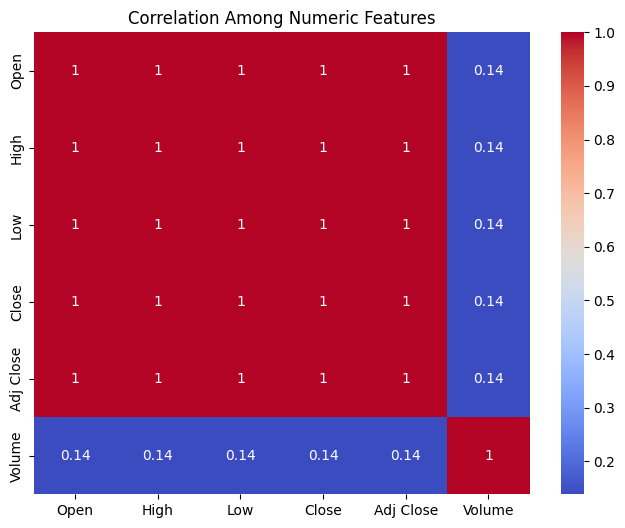

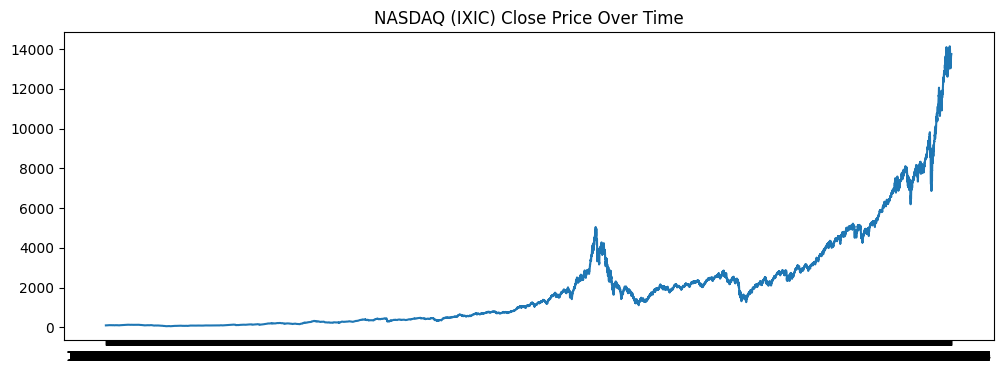

In [33]:
df_data_index['Daily_Return'] = df_data_index.groupby('Index')['Close'].pct_change()

plt.figure(figsize=(12,6))
sns.boxplot(x='Index', y='Daily_Return', data=df_data_index)
plt.xticks(rotation=90)
plt.title("Daily Return Distribution by Index")
plt.show()
'''NOTE:
Indexes with a wide IQR (interquartile range) are riskier. Indexes with a tight IQR are steadier.
The typical daily return is close to zero, but the indices differ heavily in volatility. HSI, TWII, and 399001.SZ show larger day-to-day swings, while N100 and GDAXI are comparatively stable.
'''
df_data_index['log_volume'] = np.log10(df_data_index['Volume'])

plt.figure(figsize=(14,6))
sns.boxplot(x='Index', y='log_volume', data=df_data_index)
plt.xticks(rotation=45)
plt.title("Log10 Volume Distribution by Index")
plt.show()

'''
After converting volume to a log scale, GSPTSE has the widest box in the plot (around log10 values 7–10). That means its daily trading volume swings a lot —
from about 10 million shares on some days to over 10 billion on others. This shows big changes in how much the market trades, not big swings in the index’s price.
'''

plt.figure(figsize=(8,6))
sns.heatmap(df_data_index[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Among Numeric Features")
plt.show()

Price variables all move together (corr ≈ 1.0), so they’re redundant. Volume barely correlates with price (≈ 0.14). To get more insight, we need to examine distribution patterns by index or create additional features like daily returns or volatility.

In [34]:
df_data_index.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Region,Exchange,Currency,Daily_Return,log_volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,United States,New York Stock Exchange,USD,NaN,-inf
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,United States,New York Stock Exchange,USD,-0.002799,-inf
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,United States,New York Stock Exchange,USD,0.001195,-inf
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,United States,New York Stock Exchange,USD,0.006214,-inf
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,United States,New York Stock Exchange,USD,0.001789,-inf


In [41]:
# Adding in more features
# Volatility_5D = std of last 5 daily returns
# how do I do every five day rotation?
df_data_index['Volatility_5D'] = (df_data_index.groupby('Index')['Daily_Return'].rolling(window=5).std().reset_index(level=0, drop=True))

# Volatility_10D
df_data_index['Volatility_10D'] = (df_data_index.groupby('Index')['Daily_Return'].rolling(window=10).std().reset_index(level=0, drop=True))

# Rolling_Avg_Close_7D
df_data_index['Rolling_Avg_Close_7D'] = (df_data_index.groupby('Index')['Close'].rolling(window=7).mean().reset_index(level=0, drop=True))

# Rolling_Avg_Close_30D
df_data_index['Rolling_Avg_Close_30D'] = (df_data_index.groupby('Index')['Close'].rolling(window=30).mean().reset_index(level=0, drop=True))

# Volume_Change (pct change)
df_data_index['Volume_Change'] = (df_data_index.groupby('Index')['Volume'].pct_change())

# Range = High − Low
df_data_index['Range'] =  df_data_index['High'] - df_data_index['Low']

# Intraday_Volatility = (High − Low) / Open
df_data_index['Intraday_Volatility'] =  (df_data_index['High'] - df_data_index['Low']) / (df_data_index['Open'])


/tmp/ipython-input-2093672280.py:16: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_data_index['Volume_Change'] = (df_data_index.groupby('Index')['Volume'].pct_change())


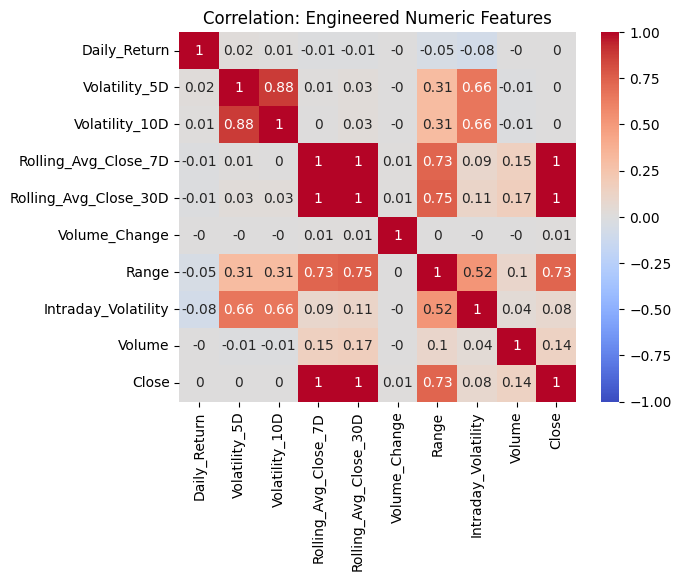

In [46]:
# check the new features
engineered_features = [
    'Daily_Return', 'Volatility_5D', 'Volatility_10D',
    'Rolling_Avg_Close_7D', 'Rolling_Avg_Close_30D',
    'Volume_Change', 'Range', 'Intraday_Volatility'
]

other_features = ['Volume', 'Close'
]

# Combine into one flat list
all_features = engineered_features + other_features

corr_matrix = df_data_index[all_features].corr()

corr_matrix_rounded = corr_matrix.round(2)

sns.heatmap(corr_matrix_rounded, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation: Engineered Numeric Features")
plt.show()


Rolling averages and short–term volatility measures also correlate strongly with the underlying Close price, so only one from each group is needed. The most unique signals come from Intraday Volatility, Range, and Volume Change, which show lower correlation and therefore capture different market behavior.

Core engineered features

- Daily_Return

- Volatility_5D OR Volatility_10D (not both)

- Rolling_Avg_Close_7D OR Rolling_Avg_Close_30D

- Volume_Change

- Range

- Intraday_Volatility

One price anchor

- Close (drop Open, High, Low)

One volume anchor

- Volume (keeping the raw value)

Next we'll compare Categorical to Numeric columns

In [56]:
pd.crosstab(df_data_index["Region"], df_data_index["Currency"])



Currency,CAD,CHF,CNY,EUR,HKD,INR,JPY,KRW,TWD,USD,ZAR
Region,,,,,,,,,,,
Canada,10776,0,0,0,0,0,0,0,0,0,0
China,0,0,11891,0,0,0,0,0,0,0,0
Europe,0,0,0,5507,0,0,0,0,0,0,0
Germany,0,0,0,8606,0,0,0,0,0,0,0
Hong Kong,0,0,0,0,8750,0,0,0,0,0,0
India,0,0,0,0,0,3381,0,0,0,0,0
Japan,0,0,0,0,0,0,14500,0,0,0,0
Korea,0,0,0,0,0,0,0,6181,0,0,0
South Africa,0,0,0,0,0,0,0,0,0,0,2387


## Step 3:  Identify 1-3 research questions and perform analysis

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well.

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.



In [ ]:
#OVERVIEW YOUR QUESTION AND PERFORM YOUR ANALYSIS IN THIS SECTION

## Step 4:  Present your findings

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?  Use _matplotlib_ visualizations to present these findings.


__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


In [ ]:
#EXPAND THIS SECTION TO PRESENT YOUR FINDINGS